# Sequence diagram - theory and practice

Diagrams in PlantUML https://bormueller.com/2020/03/07/uml-diagrams-with-plantuml/ 

## practice PKI - digital signature of document

Marta Vohnoutova

![UML sekvenční diagram](https://cdn-images.visual-paradigm.com/guide/uml/what-is-sequence-diagram/what-is-sequence-diagram.png)

UML Sequence Diagrams are interaction diagrams that detail how operations are carried out. 
They capture the interaction between objects in the context of a collaboration. 
Sequence Diagrams are time focus and they show the order of the interaction visually by using the vertical axis of the diagram to represent time what messages are sent and when.

## Sequence Diagram in UML Diagram Hierarchy

![UML rozdělení diagramů](https://cdn-images.visual-paradigm.com/guide/uml/what-is-sequence-diagram/sequence-diagram-in-uml-diagram-hierarchy.png)

**Sequence Diagrams captures:**

- the interaction that takes place in a collaboration that either realizes a use case or an operation (instance diagrams or generic diagrams)

- high-level interactions between user of the system and the system, between the system and other systems, or between subsystems (sometimes known as system sequence diagrams)

## Purpose of Sequence Diagram

- Model high-level interaction between active objects in a system
- Model the interaction between object instances within a collaboration that realizes a use case
- Model the interaction between objects within a collaboration that realizes an operation
- Either model generic interactions (showing all possible paths through the interaction) or specific instances of a interaction (showing just one path through the interaction)

## Sequence Diagrams at a Glance

Sequence Diagrams show elements as they interact over time and they are organized according to object (horizontally) and time (vertically):

## Object Dimension

- The horizontal axis shows the elements that are involved in the interaction
- Conventionally, the objects involved in the operation are listed from left to right according to when they take part in the message sequence. However, the elements on the horizontal axis may appear in any order

## Time Dimension

- The vertical axis represents time proceedings (or progressing) down the page.

Note that:

Time in a sequence diagram is all a about ordering, not duration. The vertical space in an interaction diagram is not relevant for the duration of the interaction.

## Sequence Diagram Example: Hotel System

Sequence Diagram is an interaction diagram that details how operations are carried out -- what messages are sent and when. Sequence diagrams are organized according to time. The time progresses as you go down the page. The objects involved in the operation are listed from left to right according to when they take part in the message sequence.

Below is a sequence diagram for making a hotel reservation. The object initiating the sequence of messages is a Reservation window.

### Sequence Diagram Example

![Hotel system](https://cdn-images.visual-paradigm.com/guide/uml/what-is-sequence-diagram/01-sequence-diagram-example.png)

Note That: Class and object diagrams are static model views. Interaction diagrams are dynamic. They describe how objects collaborate.


## Sequence Diagram Notation

### Actor

- a type of role played by an entity that interacts with the subject (e.g., by exchanging signals and data)
- external to the subject (i.e., in the sense that an instance of an actor is not a part of the instance of its corresponding subject).
- represent roles played by human users, external hardware, or other subjects.

Note that:

- An actor does not necessarily represent a specific physical entity but merely a particular role of some entity
- A person may play the role of several different actors and, conversely, a given actor may be played by multiple different person.



In [239]:
import iplantuml

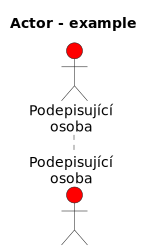

In [240]:
%%plantuml
@startuml
title
Actor - example
end title

actor "Podepisující\nosoba" as po #red

@enduml


## Lifeline

- A lifeline represents an individual participant in the Interaction.

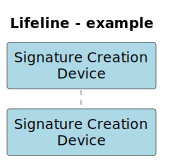

In [241]:
%%plantuml
@startuml
title
Lifeline - example
end title

participant "Signature Creation\nDevice" as scd #lightblue

@enduml


## Activations

- A thin rectangle on a lifeline) represents the period during which an element is performing an operation.
- The top and the bottom of the of the rectangle are aligned with the initiation and the completion time respectively

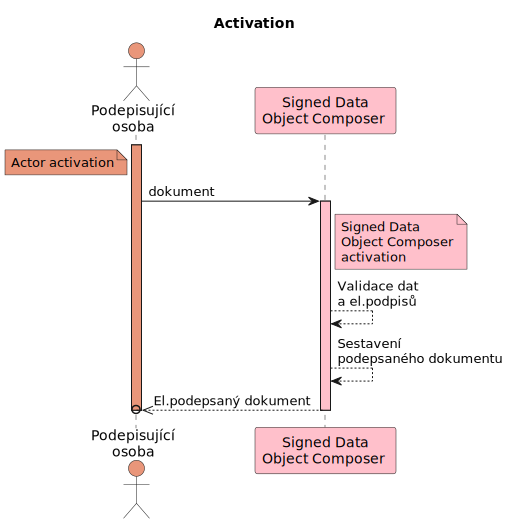

In [243]:
%%plantuml
@startuml
title
Activation
end title

actor "Podepisující\nosoba" as po #DarkSalmon
participant "Signed Data\nObject Composer" as sdoc #pink

activate po #DarkSalmon 
note left of po #DarkSalmon 
Actor activation
end note
    
po -> sdoc : dokument
    activate sdoc #pink
    
note right of sdoc #pink 
Signed Data
Object Composer
activation
end note

sdoc --> sdoc : Validace dat\na el.podpisů 
         
sdoc --> sdoc : Sestavení\npodepsaného dokumentu 
        
sdoc -->>o po : El.podepsaný dokument
    deactivate sdoc
    deactivate sdoc
    deactivate po 
@enduml


## Call Message

- A message defines a particular communication between Lifelines of an Interaction.
- Call message is a kind of message that represents an invocation of operation of target lifeline.

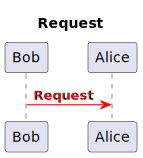

In [244]:
%%plantuml

@startuml
title
Request
end title

Bob -[#red]> Alice : <font color=red><b>Request

@enduml

## Return Message

- A message defines a particular communication between Lifelines of an Interaction.
- Return message is a kind of message that represents the pass of information back to the caller of a corresponded former message.


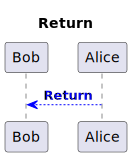

In [245]:
%%plantuml

@startuml
title
Return
end title

Bob <-[#blue]- Alice : <font color=blue><b>Return

@enduml

## Self Message

- A message defines a particular communication between Lifelines of an Interaction.
- Self message is a kind of message that represents the invocation of message of the same lifeline.


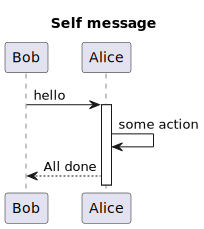

In [246]:
%%plantuml

@startuml
title
Self message
end title
Bob -> Alice : hello
activate Alice
Alice -> Alice : some action
Bob <-- Alice : All done
@enduml

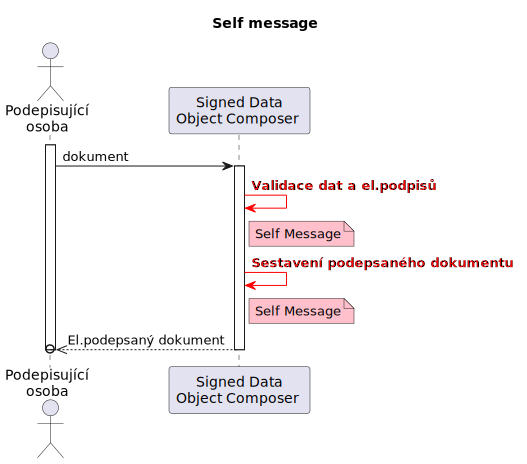

In [248]:
%%plantuml
@startuml
title
Self message
end title

actor "Podepisující\nosoba" as po
activate po
participant "Signed Data\nObject Composer" as sdoc

po -> sdoc : dokument
    activate sdoc

sdoc -[#red]> sdoc : <font color=red><b>Validace dat a el.podpisů 
note right of sdoc #pink 
Self Message
end note

sdoc -[#red]> sdoc : <font color=red><b>Sestavení podepsaného dokumentu

note right of sdoc #pink 
Self Message
end note

sdoc -->>o po : El.podepsaný dokument

deactivate sdoc
deactivate po

@enduml

## Recursive Message

- A message defines a particular communication between Lifelines of an Interaction.
- Recursive message is a kind of message that represents the invocation of message of the same lifeline. 
It's target points to an activation on top of the activation where the message was invoked from.


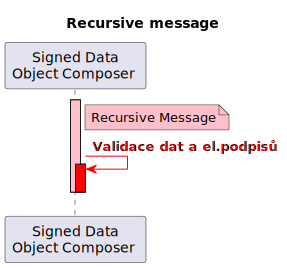

In [249]:
%%plantuml
@startuml
title
Recursive message
end title


participant "Signed Data\nObject Composer" as sdoc
activate sdoc #pink
note right of sdoc #pink 
Recursive Message
end note
sdoc -[#red]> sdoc : <font color=red><b>Validace dat a el.podpisů 
activate sdoc #red

deactivate sdoc

deactivate sdoc


@enduml

## Create Message
- A message defines a particular communication between Lifelines of an Interaction.
- Create message is a kind of message that represents the instantiation of (target) lifeline.


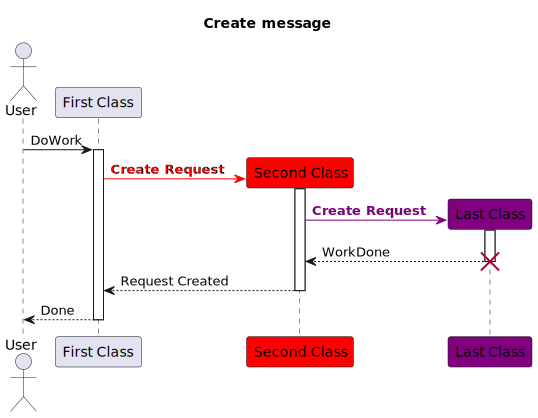

In [250]:
%%plantuml
@startuml
title
Create message
end title
actor User
participant "First Class" as A

User -> A: DoWork
activate A

create participant "Second Class" as B #red
A -[#red]> B: <font color=red><b>Create Request
activate B

create participant "Last Class" as C #purple
B -[#purple]> C: <font color=purple><b>Create Request
activate C
C --> B: WorkDone
destroy C

B --> A: Request Created
deactivate B

A --> User: Done
deactivate A
@enduml

## Destroy Message

- A message defines a particular communication between Lifelines of an Interaction.
- Destroy message is a kind of message that represents the request of destroying the lifecycle of target lifeline.


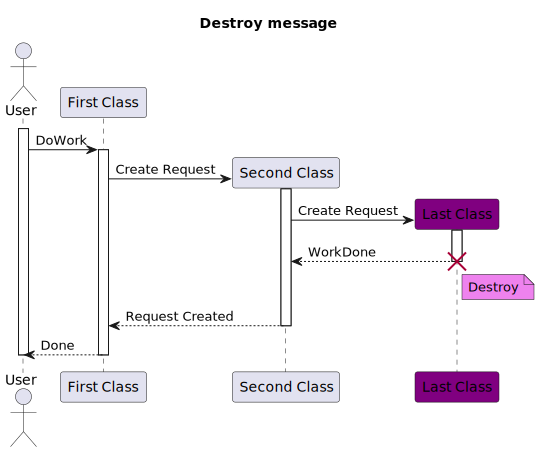

In [251]:
%%plantuml
@startuml
title
Destroy message
end title
actor User
participant "First Class" as A

activate User

User -> A: DoWork
activate A

create participant "Second Class" as B 
A -> B: Create Request
activate B

create participant "Last Class" as C #purple
B -> C: Create Request
activate C
C --> B: WorkDone
note right of C #violet 
Destroy
end note
destroy C 

B --> A: Request Created
deactivate B

A --> User: Done
deactivate A
deactivate User

@enduml

## Duration Message

- A message defines a particular communication between Lifelines of an Interaction.
- Duration message shows the distance between two time instants for a message invocation.
Duration Message


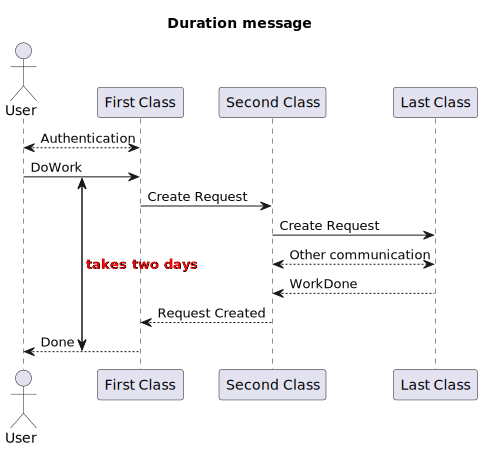

In [254]:
%%plantuml
@startuml
!pragma teoz true
title
Duration message
end title

actor User
participant "First Class" as A
participant "Second Class" as B 
participant "Last Class" as C 

User <--> A : Authentication

{start} User -> A : DoWork
 
A -> B : Create Request
 
B -> C : Create Request

B <--> C : Other communication
C --> B : WorkDone


B --> A : Request Created

{end} A --> User : Done

{start} <-> {end} : <font color=red><b>takes two days

@enduml

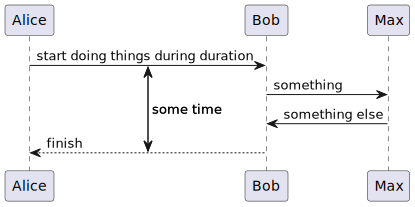

In [255]:
%%plantuml
@startuml
!pragma teoz true

{kuk1} Alice -> Bob : start doing things during duration
Bob -> Max : something
Max -> Bob : something else
{kuk2} Bob --> Alice : finish

{kuk1} <-> {kuk2} : some time
@enduml

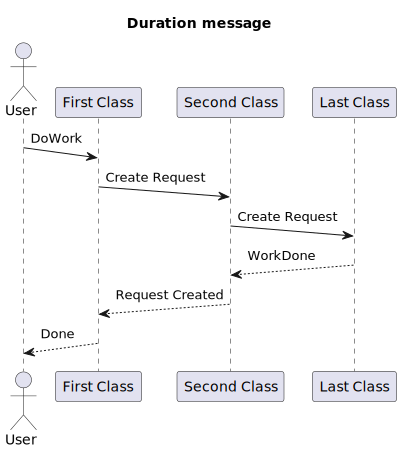

In [256]:
%%plantuml
@startuml
!pragma teoz true
title
Duration message
end title

actor User
participant "First Class" as A
participant "Second Class" as B 
participant "Last Class" as C 

User ->(10) A : DoWork
 
A ->(10) B : Create Request
 
B ->(10) C : Create Request

C -->(10) B : WorkDone


B -->(10) A : Request Created

A -->(10) User : Done

@enduml

## Note

- A note (comment) gives the ability to attach various remarks to elements. 
- A comment carries no semantic force, but may contain information that is useful to a modeler.

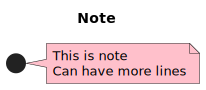

In [257]:
%%plantuml
@startuml
title
Note
end title

note right #pink 
This is note
Can have more lines
end note

@enduml

## Message and Focus of Control

- An Event is any point in an interaction where something occurs.
- Focus of control: also called execution occurrence, an execution occurrence
- It shows as tall, thin rectangle on a lifeline)
- It represents the period during which an element is performing an operation. The top and the bottom of the rectangle are aligned with the initiation and the completion time respectively.


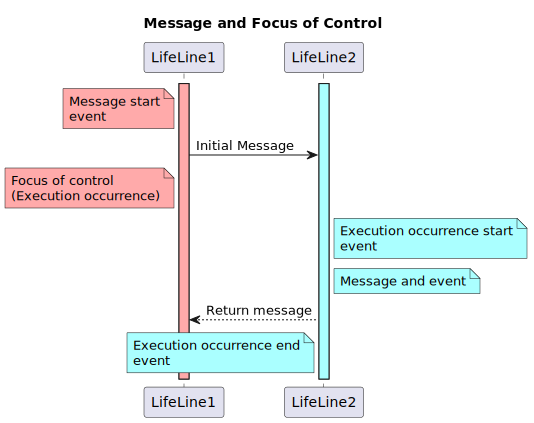

In [258]:
%%plantuml
@startuml
title
Message and Focus of Control
end title

participant "LifeLine1" as L1 
activate L1 #FFAAAA
note left L1 #FFAAAA: Message start\nevent

participant "LifeLine2" as L2 
activate L2 #AAFFFF


L1 -> L2 : Initial Message
note left L1 #FFAAAA: Focus of control\n(Execution occurrence)
note right L2 #AAFFFF: Execution occurrence start\nevent
note right L2 #AAFFFF: Message and event
L2 --> L1 : Return message
note left L2 #AAFFFF: Execution occurrence end\nevent



@enduml

## Sequence Fragments

- UML 2.0 introduces sequence (or interaction) fragments. Sequence fragments make it easier to create and maintain accurate sequence diagrams
- A sequence fragment is represented as a box, called a combined fragment, which encloses a portion of the interactions within a sequence diagram
- The fragment operator (in the top left cornet) indicates the type of fragment
- Fragment types: ref, assert, loop, break, alt, opt, neg



| **Operator** | **Fragment Type** |
| --- | --- |
| **alt** | Alternative multiple fragments: only the one whose condition is true will execute.|
| **opt** | Optional: the fragment executes only if the supplied condition is true. Equivalent to an alt only with one trace.|
| **par** | Parallel: each fragment is run in parallel.|
| **loop** | Loop: the fragment may execute multiple times, and the guard indicates the basis of iteration.|
| **region** | Critical region: the fragment can have only one thread executing it at once.|
| **neg** | Negative: the fragment shows an invalid interaction.|
| **ref** | Reference: refers to an interaction defined on another diagram. The frame is drawn to cover the lifelines involved in the interaction. You can define parameters and a return value.|
| **sd** | Sequence diagram: used to surround an entire sequence diagram.|

Note That:

- It is possible to combine frames in order to capture, e.g., loops or branches.
- Combined fragment keywords: alt, opt, break, par, seq, strict, neg, critical, ignore, consider, assert and loop.
- Constraints are usually used to show timing constraints on messages. They can apply to the timing of one message or intervals between messages.


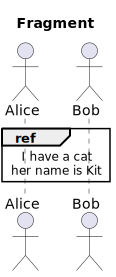

In [259]:
%%plantuml
@startuml
title
Fragment
end title
actor Alice
actor Bob

ref over Alice,Bob 
I have a cat
her name is Kit
end ref

@enduml

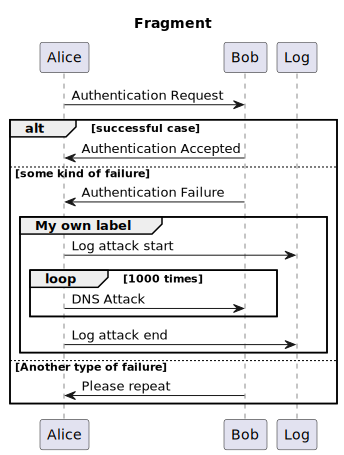

In [260]:
%%plantuml
@startuml
title
Fragment
end title

Alice -> Bob: Authentication Request

alt successful case

    Bob -> Alice: Authentication Accepted

else some kind of failure

    Bob -> Alice: Authentication Failure
    group My own label
    Alice -> Log : Log attack start
        loop 1000 times
            Alice -> Bob: DNS Attack
        end
    Alice -> Log : Log attack end
    end

else Another type of failure

   Bob -> Alice: Please repeat

end
@enduml

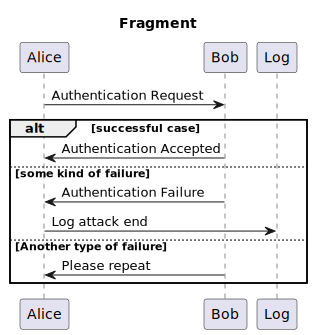

In [262]:
%%plantuml
@startuml
title
Fragment
end title

Alice -> Bob: Authentication Request

alt successful case

    Bob -> Alice: Authentication Accepted

else some kind of failure

    Bob -> Alice: Authentication Failure
   
    Alice -> Log : Log attack end
   

else Another type of failure

   Bob -> Alice: Please repeat

end
@enduml

## Combined Fragment Example

![Combined Fragment example](https://cdn-images.visual-paradigm.com/guide/uml/what-is-sequence-diagram/15-combined-fragment-example.png)

## Sequence Diagram for Modeling Use Case Scenarios

User requirements are captured as use cases that are refined into scenarios. A use case is a collection of interactions between external actors and a system. In UML, a use case is:

*"the specification of a sequence of actions, including variants, that a system (or entity) can perform, interacting with actors of the system."*

A scenario is one path or flow through a use case that describes a sequence of events that occurs during one particular execution of a system which is often represented by a sequence diagram.

![Sequence scenario](https://cdn-images.visual-paradigm.com/guide/uml/what-is-sequence-diagram/16-sequence-diagram-for-use-case.png)


## Sequence Diagram - Model before Code

Sequence diagrams can be somewhat close to the code level, so why not just code up that algorithm rather than drawing it as a sequence diagram?

- A good sequence diagram is still a bit above the level of the real code
- Sequence diagrams are language neutral
- Non-coders can do sequence diagrams
- Easier to do sequence diagrams as a team
- Can be used for testing and/or UX Wireframing

# Training

## Sekvenční diagram - PKI - elektronický podpis dokumentu

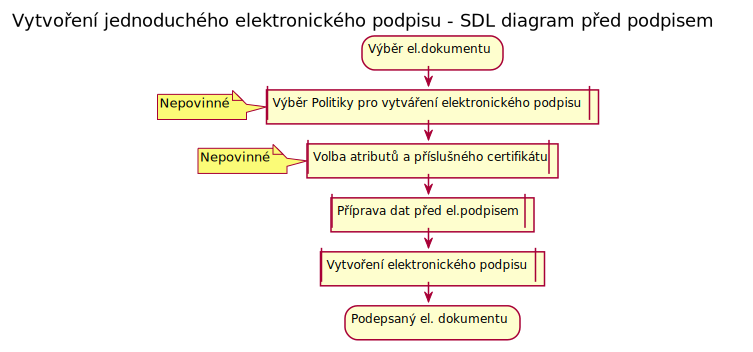

In [263]:
%%plantuml
@startuml
title
Vytvoření jednoduchého elektronického podpisu - SDL diagram před podpisem
end title

:Výběr el.dokumentu;
:Výběr Politiky pro vytváření elektronického podpisu|
note: Nepovinné
:Volba atributů a příslušného certifikátu|
note: Nepovinné
:Příprava dat před el.podpisem|
:Vytvoření elektronického podpisu|
:Podepsaný el. dokumentu;

@enduml


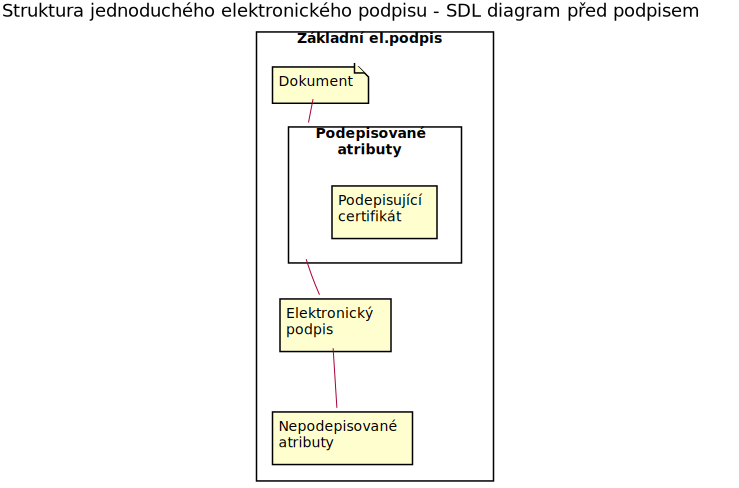

In [264]:
%%plantuml
@startuml
title
Struktura jednoduchého elektronického podpisu - SDL diagram před podpisem
end title

rectangle "Základní el.podpis" {
    file Dokument as d
    rectangle "Podepisované\natributy" as pa {
        rectangle "Podepisující\ncertifikát" 
    }
    rectangle "Elektronický\npodpis" as ep
    rectangle "Nepodepisované\natributy" as na
}

d -d- pa
pa -- ep
ep -- na

@enduml


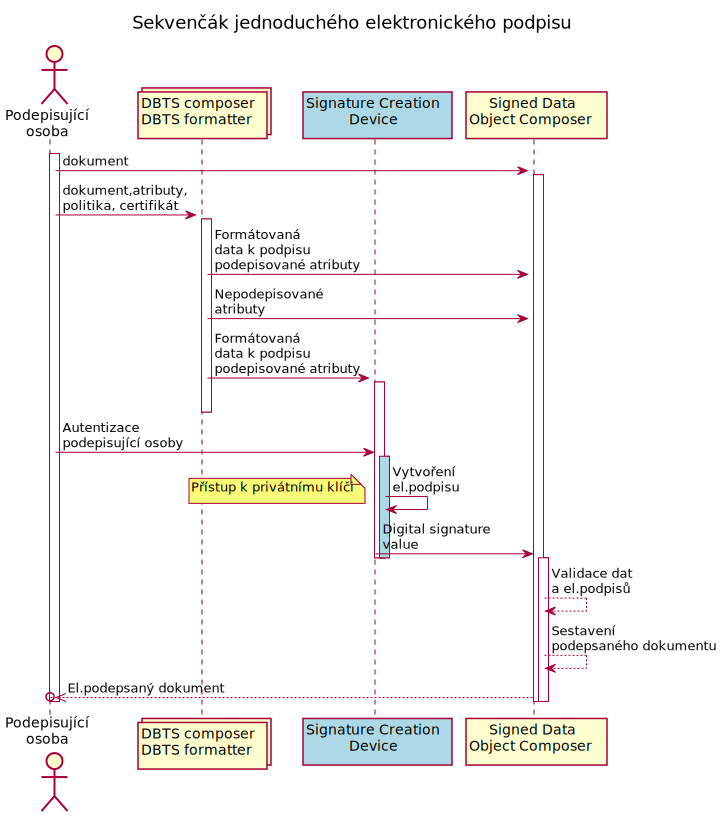

In [265]:
%%plantuml
@startuml
title
Sekvenčák jednoduchého elektronického podpisu 
end title

actor "Podepisující\nosoba" as po
collections "DBTS composer\nDBTS formatter" as dbts
participant "Signature Creation\nDevice" as scd #lightblue
participant "Signed Data\nObject Composer" as sdoc

activate po    
po -> sdoc : dokument
    activate sdoc
po -> dbts : dokument,atributy,\npolitika, certifikát
    
    activate dbts

dbts -> sdoc : Formátovaná\ndata k podpisu\npodepisované atributy
dbts -> sdoc : Nepodepisované\natributy    
dbts -> scd : Formátovaná\ndata k podpisu\npodepisované atributy
    activate scd
    
    deactivate dbts
    
    
po -> scd : Autentizace\npodepisující osoby   
    
    activate scd #LightBlue
scd -> scd : Vytvoření\nel.podpisu    

    note left: Přístup k privátnímu klíči

scd -> sdoc : Digital signature\nvalue
    deactivate scd
    deactivate scd
    activate sdoc
sdoc --> sdoc : Validace dat\na el.podpisů
     
    
sdoc --> sdoc : Sestavení\npodepsaného dokumentu
    
    
sdoc -->>o po : El.podepsaný dokument
    deactivate sdoc
    deactivate sdoc
    deactivate po 
@enduml


# SAML v.2 - sekvenčák

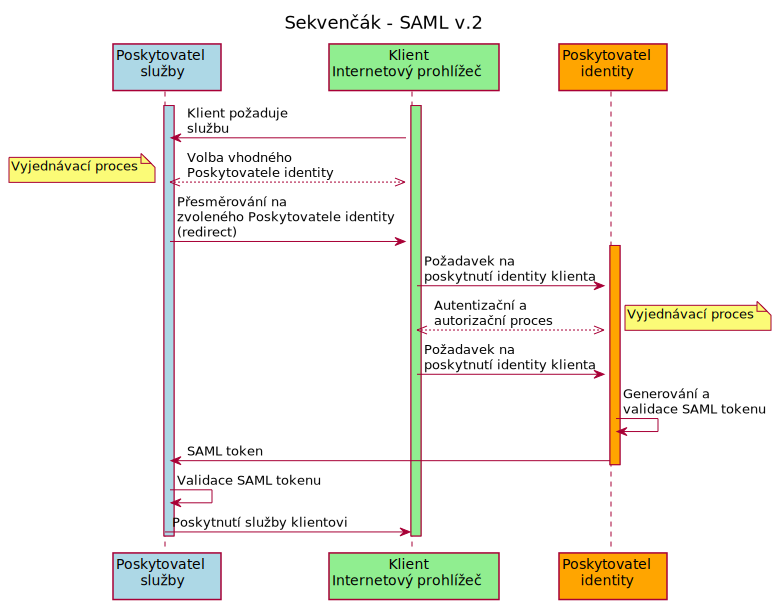

In [267]:
%%plantuml
@startuml
' !theme toy
title
Sekvenčák - SAML v.2 
end title

participant "Poskytovatel\nslužby" as ps #lightblue
participant "Klient\nInternetový prohlížeč" as k #lightgreen
participant "Poskytovatel\nidentity" as pi #Orange

activate k #LightGreen
activate ps #LightBlue
k -> ps : Klient požaduje\nslužbu
k <<-->> ps : Volba vhodného\nPoskytovatele identity
    note left: Vyjednávací proces
ps -> k : Přesměrování na\nzvoleného Poskytovatele identity\n(redirect)
activate pi #Orange
k -> pi : Požadavek na \nposkytnutí identity klienta
k <<-->> pi : Autentizační a\nautorizační proces
    note right: Vyjednávací proces
k -> pi : Požadavek na \nposkytnutí identity klienta
pi -> pi : Generování a\nvalidace SAML tokenu
pi -> ps : SAML token
deactivate pi
ps -> ps : Validace SAML tokenu
ps -> k : Poskytnutí služby klientovi

deactivate ps
deactivate k

@enduml


# Sekvenčák - reklamace

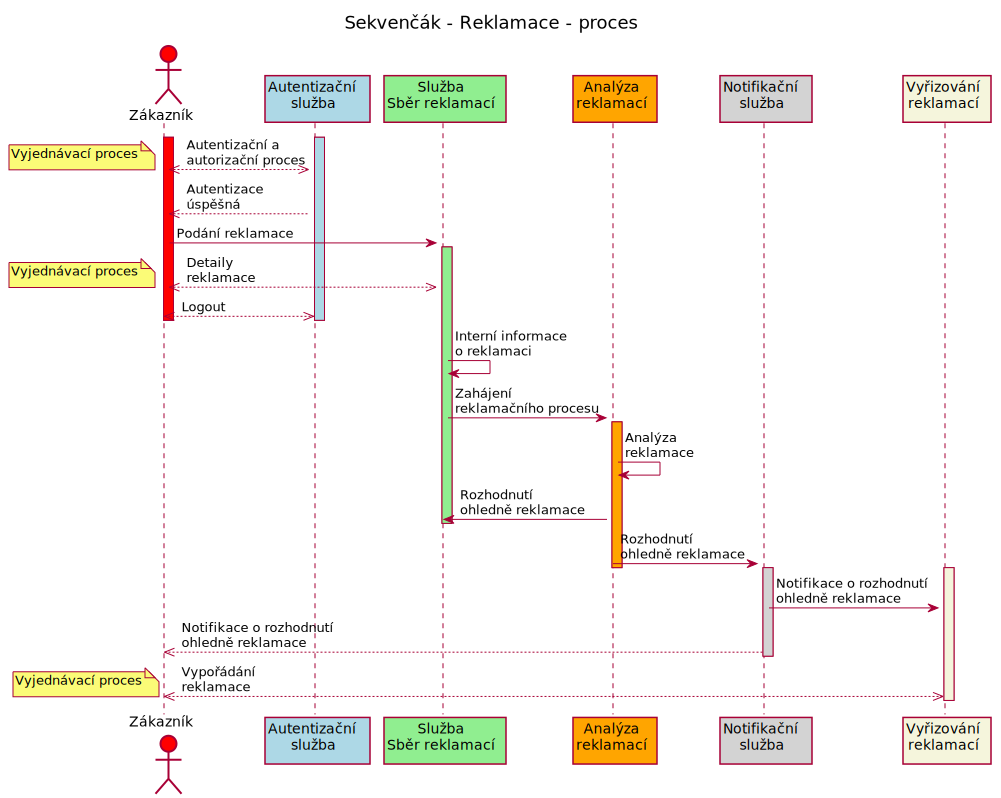

In [268]:
%%plantuml
@startuml
title
Sekvenčák - Reklamace - proces 
end title

actor Zákazník as z #red
participant "Autentizační\nslužba" as as #lightblue
participant "Služba\nSběr reklamací" as sr #lightgreen
participant "Analýza\nreklamací" as ar #Orange
participant "Notifikační\nslužba" as ns #LightGrey
participant "Vyřizování\nreklamací" as vr #Beige

activate z #red
activate as #lightblue
z <<-->> as : Autentizační a\nautorizační proces
    note left: Vyjednávací proces
as -->> z : Autentizace\núspěšná
z -> sr : Podání reklamace
activate sr #lightgreen
    
sr <<-->> z : Detaily\nreklamace
    note left: Vyjednávací proces
z <<-->> as : Logout
    
deactivate z
deactivate as

        
sr -> sr: Interní informace\no reklamaci
sr -> ar : Zahájení\nreklamačního procesu
    
activate ar #Orange
ar -> ar: Analýza\nreklamace
ar -> sr : Rozhodnutí\nohledně reklamace
deactivate sr

ar -> ns : Rozhodnutí\nohledně reklamace    
deactivate ar
activate ns #lightgrey
activate vr #beige
ns -> vr : Notifikace o rozhodnutí\nohledně reklamace
ns -->> z : Notifikace o rozhodnutí\nohledně reklamace
deactivate ns

vr <<-->> z : Vypořádání\nreklamace
    note left: Vyjednávací proces
deactivate vr

@enduml


# Sevenčák - SSL/TLS

Server Name Indication (zkratka SNI) je v informatice metoda, jak obejít nedostatek v protokolu SSL v2, který neumožňuje při přístupu přes HTTPS vytvářet virtuální webové servery – tj. více různých doménových jmen umístěných na jedné IP adrese (využívá se při webhostingu). Pomocí SNI může klient před výměnou šifrovacích klíčů nejprve sdělit jméno požadovaného webového serveru a server tak může vybrat příslušný šifrovací klíč požadovaného virtuálního serveru.

ChangeCipherSpec se v SSL používají k označení, že komunikace je posunuta z nešifrované na šifrovanou. Tato zpráva informuje, že následující data budou zašifrována pomocí sdíleného tajemství.

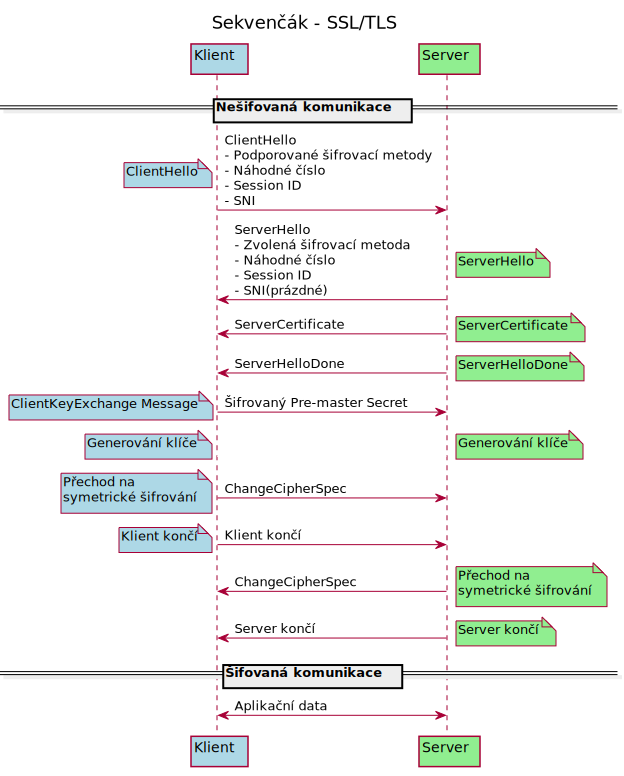

In [270]:
%%plantuml
@startuml
title
Sekvenčák - SSL/TLS 
end title

participant "Klient" as k #lightblue
participant "Server" as s #lightgreen

== Nešifovaná komunikace ==

k -> s : ClientHello\n- Podporované šifrovací metody\n- Náhodné číslo\n- Session ID\n- SNI
note left #LightBlue
ClientHello
end note
s -> k : ServerHello\n- Zvolená šifrovací metoda\n- Náhodné číslo\n- Session ID\n- SNI(prázdné)
note right #LightGreen
ServerHello
end note
s -> k : ServerCertificate
note right #LightGreen
ServerCertificate
end note
s -> k : ServerHelloDone
note right #LightGreen
ServerHelloDone
end note
k -> s : Šifrovaný Pre-master Secret 
note left #LightBlue
ClientKeyExchange Message
end note

k <<-[#FFFFFF]->> s 
note left #LightBlue
Generování klíče
end note

note right #LightGreen
Generování klíče
end note

    
    
k -> s :  ChangeCipherSpec
note left #LightBlue
Přechod na
symetrické šifrování
end note
k -> s :  Klient končí
note left #LightBlue
Klient končí
end note
    
s -> k :  ChangeCipherSpec
note right #LightGreen
Přechod na
symetrické šifrování
end note
s -> k :  Server končí
note right #LightGreen
Server končí
end note

== Šifovaná komunikace ==
k <-> s : Aplikační data
@enduml

## Autentizace pomoci NIA

![NIA Oauth2](https://www.opensourceforu.com/wp-content/uploads/2021/04/Figure-2-OAuth2-sequence-diagram.jpg)

## NIA - Sekvenční diagram přihlašovacího procesu

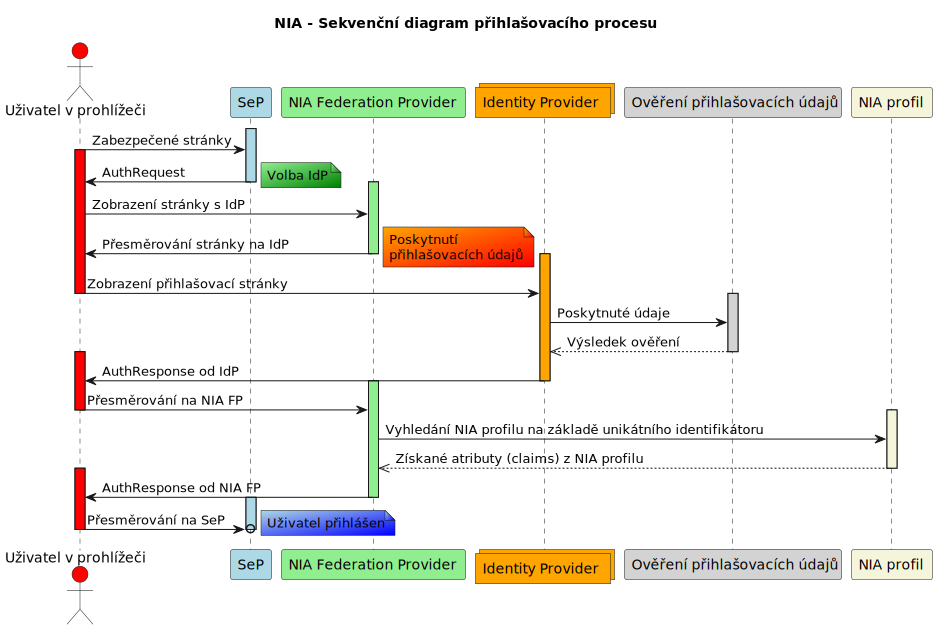

In [271]:
%%plantuml
@startuml
title
NIA - Sekvenční diagram přihlašovacího procesu
end title

actor "Uživatel v prohlížeči" as už #red
participant "SeP" as sp #lightblue
participant "NIA Federation Provider" as fp #lightgreen
collections "Identity Provider" as ip #Orange
participant "Ověření přihlašovacích údajů" as opú #LightGrey
participant "NIA profil" as profil #Beige

activate sp #lightblue
už -> sp : Zabezpečené stránky

activate už #red
sp -> už: AuthRequest
deactivate sp

activate fp #lightgreen
note right #lightgreen/green
Volba IdP
end note
už -> fp: Zobrazení stránky s IdP

    

fp -> už: Přesměrování stránky na IdP
deactivate fp
activate ip #Orange
note right #Orange/red
Poskytnutí
přihlašovacích údajů
end note
už -> ip: Zobrazení přihlašovací stránky
deactivate už

activate opú #LightGrey
ip -> opú: Poskytnuté údaje
opú -->> ip: Výsledek ověření
deactivate opú

activate už #red
ip -> už: AuthResponse od IdP
deactivate ip

activate fp #lightgreen
už -> fp: Přesměrování na NIA FP
deactivate už

activate profil #Beige
fp -> profil: Vyhledání NIA profilu na základě unikátního identifikátoru
profil -->> fp: Získané atributy (claims) z NIA profilu
deactivate profil

activate už #red
fp -> už: AuthResponse od NIA FP
deactivate fp

activate sp #lightblue
už ->o sp: Přesměrování na SeP
deactivate už
deactivate sp
note right #lightblue/blue
Uživatel přihlášen
end note

@enduml


## Komunikační diagramy

![Communication diagrams](https://cdn-images.visual-paradigm.com/guide/uml/what-is-communication-diagram/what-is-communication-diagram.png)

UML communication diagrams, like the sequence diagrams - a kind of interaction diagram, shows how objects interact. A communication diagram is an extension of object diagram that shows the objects along with the messages that travel from one to another. In addition to the associations among objects, communication diagram shows the messages the objects send each other.

### Communication Diagram in UML Diagram Hierarchy

![Place of communication diagram](https://cdn-images.visual-paradigm.com/guide/uml/what-is-communication-diagram/01-communication-diagram-in-uml-diagram-hierarchy.png)

### Purpose of Communication Diagram

- Model message passing between objects or roles that deliver the functionalities of use cases and operations
- Model mechanisms within the architectural design of the system
- Capture interactions that show the passed messages between objects and roles within the collaboration scenario
- Model alternative scenarios within use cases or operations that involve the collaboration of different objects and interactions
- Support the identification of objects (hence classes), and their attributes (parameters of message) and operations (messages) that participate in use cases

### Communication Diagram at a Glance

In the example of the notation for a communication diagram, objects (actors in use cases) are represented by rectangles. In the example (generic communication diagram):

- The objects are Object1, Object2, Object..., ObjectN-1 ..., and ObjectN.
- Messages passed between objects are represented by labeled arrows that start with the sending object (actor) and end with the receiving object.
- The sample messages passed between objects are labeled 1: message1, 2: message2, 3: message3, etc., where the numerical prefix to the message name indicates its order in the sequence.
- Object1 first sends Object2 the message message1, Object2 in turn sends ObjectN-1 the message message2, and so on.
- Messages that objects send to themselves are indicated as loops (e.g., message message5).

### Basic Communication Diagram

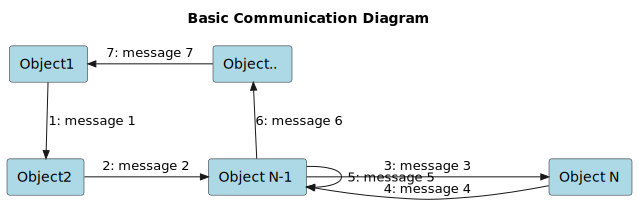

In [272]:
%%plantuml
@startuml
title
Basic Communication Diagram
end title

rectangle "Object1" as O1 #LightBlue
rectangle "Object2" as O2 #LightBlue
rectangle "Object.." as O #LightBlue
rectangle "Object N-1" as ON_1 #LightBlue
rectangle "Object N" as ON #LightBlue

O1 -down->> O2: 1: message 1
O2 -right->> ON_1: 2: message 2
ON_1 -right->> ON: 3: message 3    
ON -left->> ON_1: 4: message 4 
ON_1 -->> ON_1: 5: message 5 
ON_1 -up->> O: 6: message 6 
O -left->> O1: 7: message 7 

@enduml

### Communication Example - Hotel Reservation


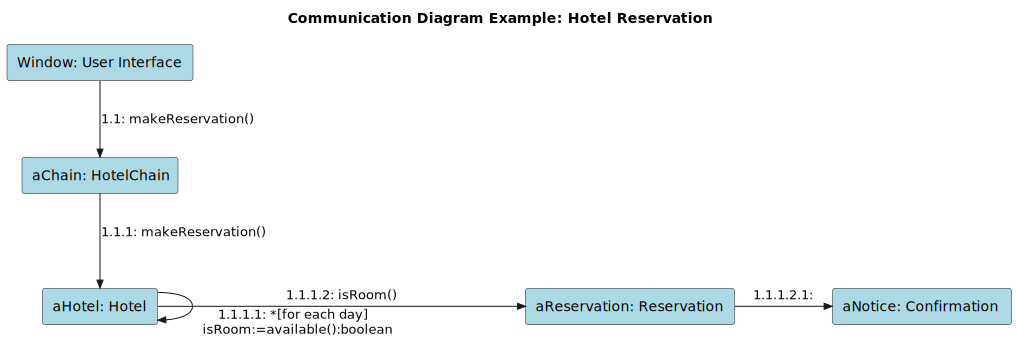

In [273]:
%%plantuml
@startuml
title
Communication Diagram Example: Hotel Reservation
end title

rectangle "Window: User Interface" as W #LightBlue
rectangle "aChain: HotelChain" as CH #LightBlue
rectangle "aHotel: Hotel" as H #LightBlue
rectangle "aReservation: Reservation" as R #LightBlue
rectangle "aNotice: Confirmation" as C #LightBlue

W -down->> CH: 1.1: makeReservation()
CH -down->> H: 1.1.1: makeReservation()
H -down->> H: \n\n1.1.1.1: *[for each day]\n isRoom:=available():boolean    
H -right->> R: 1.1.1.2: isRoom() 
R -right->> C: 1.1.1.2.1: 

@enduml


- Each message in a communication diagram has a sequence number.
- The top-level message is numbered 1.
- Messages sent during the same call have the same decimal prefix, but suffixes of 1, 2, etc. according to when they occur.

### Communication Diagram vs Sequence Diagram

The communication diagram and the sequence diagram are similar. They're semantically equivalent, that is, the present the same information, and you can turn a communication to a sequence diagram and vice versa. The main distinction between them is that the communication diagram arranged elements according to space, the sequence diagram is according to time.

Of the two types of interaction diagrams, sequence diagrams seem to be used far more than communication diagrams. So, why would you use communication diagrams? First of all, they are very useful for visualizing the relationship between objects collaborating to perform a particular task. This is difficult to determine from a sequence diagram. In addition, communication diagrams can also help you determine the accuracy of your static model (i.e., class diagrams).

### Example - Sequence diagram vs Communication (Library Item Overdue)

### Sequence Diagram

![Sequence diagram](https://cdn-images.visual-paradigm.com/guide/uml/what-is-communication-diagram/04-sequence-diagram.png)

### Communication Diagram generated from Sequence Diagram

![Communication diagram](https://cdn-images.visual-paradigm.com/guide/uml/what-is-communication-diagram/05-communication-diagram-generated-from-sequence-diagram.png)

Note: If you compare the two diagrams, you'll see they both contain objects and messages. It also becomes clear that it's much easier to determine the time ordering of messages by looking at the sequence diagram and it's easier to see the relationships between objects by looking at the communication diagram.

### Communication Diagram Elements

**Objects** participating in a collaboration come in two flavors: supplier and client.

- **Supplier objects** are the objects that supply the method that is being called, and therefore receive the message.
- **Client objects** call methods on supplier objects, and therefore send messages.

### Links

- The connecting lines drawn between objects in a communication diagram are links.
- These links are what set communication diagrams apart from sequence diagrams. They enable you to see the relationships between objects.
- Each link represents a relationship between objects and symbolizes the ability of objects to send messages to each other.
- If an object sends messages to itself, the link carrying these messages is represented as a loop icon. This loop can be seen on both the UI object and the Transaction object.

### Messages 

in communication diagrams are shown as arrows pointing from the Client object to the Supplier object. Typically, messages represent a client invoking an operation on a supplier object. They can be modeled along with the objects in the following manner:

- Message icons have one or more messages associated with them.
- Messages are composed of message text prefixed by a sequence number.
- This sequence number indicates the time-ordering of the message.

For example, in the communication diagram in the figure below, you can follow the sequence numbers to determine the order of messages between objects:

### Communication Diagram elements

![Diagram elements](https://cdn-images.visual-paradigm.com/guide/uml/what-is-communication-diagram/06-communication-diagram-elements.png)

### Understanding the Numbering of Messages in Communication Diagram

- The first message in a communication diagram is always numbered 1, the second is 2, and so on.
- You can indicate that a message is nested under a parent message by adding a decimal point and incremental digits to the parent's sequence number.

For example:

Based on the example above, the "CalAmtCanBorrow" message is the first nested message under "EnquireBorrower" and is given the sequence number 1.1. The second nested message under "EnquireBorrower" is "DisplayInvalidMsg", so it's given a sequence number of 1.2.

### Example - From Sequence Diagram to Communication Diagram

### Sequence Diagram to Communication Diagram

![Understand diagrams](https://cdn-images.visual-paradigm.com/guide/uml/what-is-communication-diagram/07-from-sequence-diagram-to-communication-diagram.png)

Note that:

- Focus of control: also called execution occurrence/activation. It shows as tall, thin rectangle on a lifeline that represents the period during which an element is performing an operation.
- The top and the bottom of the rectangle are aligned with the initiation and the completion time respectively.
- In communication diagram focus of control is explicit and thus, can be represented by the message nest numbering.

# Cvičení

Nakreslete komunikační diagram, kde

- Uživatel žádá o službu Service Providera (SP)
- SP požaduje po NIA ověření uživatele
- NIA nabízí uživateli dostupné IdP
- Uživatel se ověřuje u zvoleného IdP
- IdP informuje NIA o ověření Uživatele
- NIA žádá Základní registry o informace (atributy) o Uživateli, a ZR je NIA poskytují
- NIA dává SP požadované atributy o Uživateli
- SP zpřístupní Uživateli službu

Nakreslete sekvenční diagram Registrace a konfigurace SeP na základě ověření přes ISDS

- Požadavek zástupce organizace vůči "Portálu Národního bodu pro registraci SP (PNB)" na registraci organizace jako SP
- PNB žádá NIA o ověření organizace
- NIA nabízí zástupci organizace ISDS k ověření
- Zástupce organizace se ověřuje vůči ISDS
- ISDS dává zprávu o ověření NIA
- NIA žádá ZR o atributy k organizaci, ZR je poskytuje
- NIA dává atributy PNB
- PNB nabízí zástupci organizace možnost registrace SP
- Organizace se registruje jako SP na PNB
- PNB nabízí organizaci možnost konfigurace SP
- Organizace provádí konfigiraci SP na PNB

